In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


with open("../Data/extractedAndcleanedData/usersessions.csv", "r", encoding="utf-8") as f:
    lines = [line.strip().split(",") for line in f]

max_cols = max(len(row) for row in lines)

lines_padded = [row + ['']*(max_cols - len(row)) for row in lines]

df2 = pd.DataFrame(lines_padded, columns=[f"col_{i}" for i in range(max_cols)])

transactions = df2.apply(lambda row: [str(x) for x in row if str(x).strip() not in ["", "NA"]], axis=1).tolist()

In [56]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)



In [57]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 250


In [58]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
rules = rules[
    (rules['antecedents'].apply(len) > 0) &
    (rules['consequents'].apply(len) > 0)
]
print("Association Rules:", rules.shape[0])
rules_sorted_conf = rules.sort_values(by="confidence", ascending=False)
rules_sorted_conf.head(10)


Association Rules: 923


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
166,"(/history/apollo/images, /facilities)",(/images),0.019761,0.649578,0.019726,0.998246,1.536761,1.0,0.006890,199.790659,0.356322,0.030366,0.994995,0.514307
897,"(/shuttle/countdown/video, /shuttle/countdown/...",(/htbin),0.010863,0.104889,0.010725,0.987238,9.412175,1.0,0.009585,70.138304,0.903570,0.102112,0.985742,0.544742
768,"(/shuttle/countdown/video, /shuttle/countdown/...",(/htbin),0.011012,0.104889,0.010868,0.986960,9.409529,1.0,0.009713,68.645719,0.903676,0.103474,0.985432,0.545288
899,"(/shuttle/countdown/video, /shuttle/countdown/...",(/shuttle/countdown),0.010868,0.254311,0.010725,0.986788,3.880236,1.0,0.007961,56.440914,0.750440,0.042147,0.982282,0.514480
795,"(/shuttle/countdown/video, /shuttle/countdown/...",(/shuttle/countdown),0.011012,0.254311,0.010863,0.986511,3.879145,1.0,0.008063,55.280382,0.750475,0.042691,0.981910,0.514614
781,"(/shuttle/countdown/video, /shuttle/countdown/...",(/htbin),0.012522,0.104889,0.012334,0.984974,9.390594,1.0,0.011020,59.571962,0.904841,0.117378,0.983214,0.551282
345,"(/shuttle/countdown/images, /images)",(/htbin),0.024593,0.104889,0.024217,0.984699,9.387969,1.0,0.021637,58.500185,0.916008,0.230056,0.982906,0.607790
735,"(/shuttle/countdown/images, /images, /shuttle/...",(/htbin),0.019186,0.104889,0.018884,0.984258,9.383765,1.0,0.016872,56.861530,0.910910,0.179525,0.982413,0.582150
390,"(/shuttle/countdown/video, /shuttle/countdown/...",(/htbin),0.012849,0.104889,0.012631,0.983044,9.372193,1.0,0.011283,52.791178,0.904929,0.120171,0.981057,0.551733
680,"(/history/apollo/images, /shuttle/missions, /i...",(/images),0.011571,0.649578,0.011363,0.982028,1.511794,1.0,0.003847,19.498487,0.342498,0.017488,0.948714,0.499761


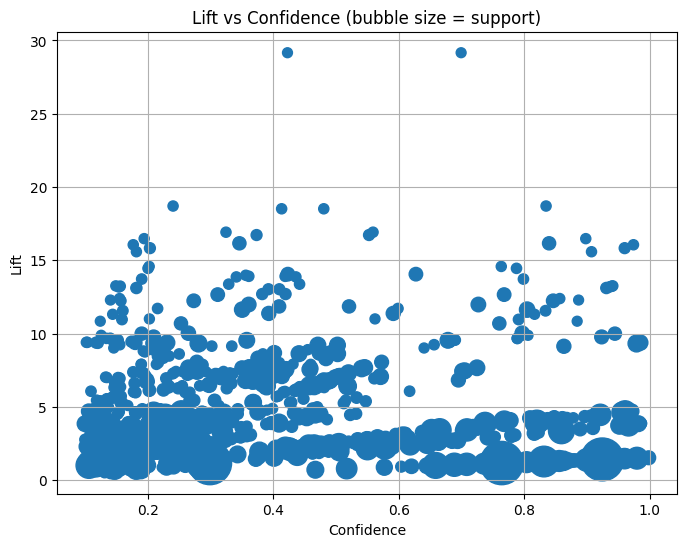

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], s=rules['support']*5000)

plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Lift vs Confidence (bubble size = support)")
plt.grid(True)
plt.show()

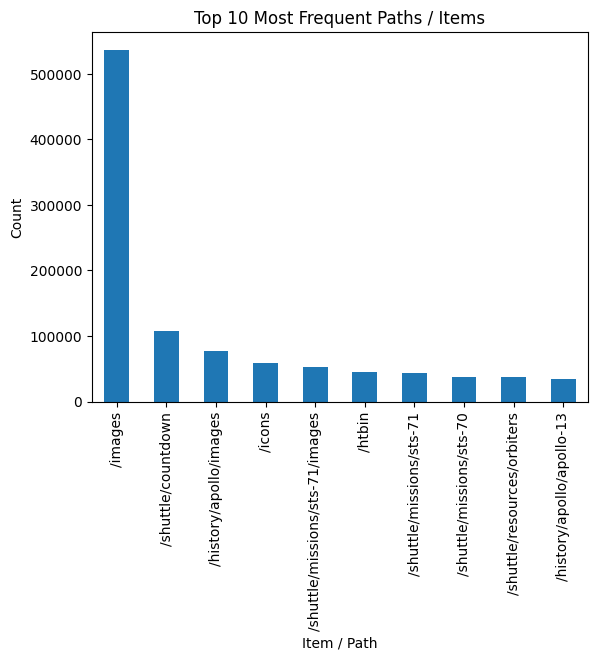

In [60]:
import matplotlib.pyplot as plt

all_items = df2.values.flatten()  

all_items = [str(x) for x in all_items if str(x).strip() not in ["", "NA"]]

items_series = pd.Series(all_items)

top_items = items_series.value_counts().head(10)

top_items.plot(kind='bar', title='Top 10 Most Frequent Paths / Items')
plt.xlabel("Item / Path")
plt.ylabel("Count")
plt.show()


In [61]:
rules.to_csv("../Data/apriori/apriori_rules.csv", index=False)
